In [4]:
def filter_news(news_data, company_filter):
    news_data['Text'] = news_data['Text'].apply(str.lower)
    company_filter['Symbol'] = company_filter['Symbol'].apply(str).apply(str.lower)
    company_filter['Company Name'] = company_filter['Company Name'].apply(str).apply(str.lower)
    final_data = pd.DataFrame()
    news_data['Text'] = news_data['Text'].str.replace('[^\w\s]', ' ')
    news_data['Text'] = " "+news_data['Text']+" "

    # iterate all company names to find out the match
    for i in range(len(company_filter)-1):
        try:
            keyword = " "+company_filter["Symbol"][i]+" "
            CompanyName = " "+company_filter["Company Name"][i]+" "
            l=[" global "," wealth "," take "," focus "," worth "]
            if(keyword == 'ttl'):
                continue
            
            if(keyword in l):
                print(keyword)
                contain_values = news_data[(news_data['Text'].str.contains(keyword))&(news_data['Text'].str.contains(CompanyName))]
                contain_values['Symbol'] = company_filter["Symbol"][i]
                contain_values['Company Name'] = company_filter["Company Name"][i]
                final_data = final_data.append(contain_values, ignore_index=True)

            else:
                contain_values = news_data[(news_data['Text'].str.contains(keyword))|(news_data['Text'].str.contains(CompanyName))]
                contain_values['Symbol'] = company_filter["Symbol"][i]
                contain_values['Company Name'] = company_filter["Company Name"][i]
                final_data = final_data.append(contain_values, ignore_index=True)

        except:
            print("Company name is small at index ", l)

    return final_data
data1['Headline']=data1['Text']

NameError: name 'np' is not defined

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('stock_data.csv')
df['Text'] = df['Text'].astype(str)
df.drop_duplicates(subset="Text",
                     keep=False, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Sentiment'] = df['Sentiment'].astype(np.int64)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32658 entries, 0 to 32657
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       32658 non-null  object        
 1   Date       32658 non-null  datetime64[ns]
 2   Sentiment  32658 non-null  int64         
 3   Tok_text   32656 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB
None


In [3]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import pandas as pd
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from nltk.stem import WordNetLemmatizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D, Bidirectional,GRU,Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical
lemmatizer = WordNetLemmatizer()


df = pd.read_csv('stock_data.csv')
df['Text'] = df['Text'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['Sentiment'] = df['Sentiment'].astype(np.int64)
print(df.info())

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

to_remove = ['up', 'down','low','high','below','less','fall']
new_stopwords = set(stopwords.words('english')).difference(to_remove)
stemmer = SnowballStemmer(language='english')
def text_data_cleaning(sentence):
    sent = preprocess_text(sentence)
    doc = nltk.word_tokenize(sent)
    lemma =[stemmer.stem(word) for word in doc]
    return append_message(lemma)
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    sentence = sen.lower()
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub('Stocks|market', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(new_stopwords) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

def append_message(text):
  str = " "
  return (str.join(text))

df['Tok_text'] = df['Text'].apply(text_data_cleaning)
df['Tok_text'] = df['Tok_text'].astype(str)

df = df.drop_duplicates(subset='Tok_text',keep='first')
df2 = df.iloc[:,2:]

X = df2['Tok_text']
y= df2['Sentiment']

df_train, df_test = train_test_split(df2, test_size=0.3, random_state=42,
                                     stratify=df2['Sentiment'])
df_test, df_val = train_test_split(df_test, test_size=0.5, random_state=42,
                                     stratify=df_test['Sentiment'])

vocab = set()
for x in X:
    vocab.add(x)
tokenizer = Tokenizer(num_words=len(vocab))
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
max_length = max(len(sequence) for sequence in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.3, random_state=42,stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52804 entries, 0 to 52803
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       52804 non-null  object        
 1   Date       52804 non-null  datetime64[ns]
 2   Sentiment  52804 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ MB
None


In [7]:
import pickle
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))
pickle.dump(sequences, open("sequences.pkl", "wb"))
pickle.dump(max_length, open("max_length.pkl", "wb"))

Epoch 1/5
13/13 [==============================] - 22s 1s/step - loss: 1.0230 - sparse_categorical_accuracy: 0.4983 - val_loss: 0.8945 - val_sparse_categorical_accuracy: 0.5208
Epoch 2/5
13/13 [==============================] - 18s 1s/step - loss: 0.7185 - sparse_categorical_accuracy: 0.6891 - val_loss: 0.5554 - val_sparse_categorical_accuracy: 0.8009
Epoch 3/5
13/13 [==============================] - 18s 1s/step - loss: 0.4279 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.3749 - val_sparse_categorical_accuracy: 0.8573
Epoch 4/5
13/13 [==============================] - 16s 1s/step - loss: 0.2921 - sparse_categorical_accuracy: 0.8968 - val_loss: 0.3432 - val_sparse_categorical_accuracy: 0.8710
Epoch 5/5
491/491 [==============================] - 2s 4ms/step - loss: 0.3431 - sparse_categorical_accuracy: 0.8744
Test loss: 0.3431006371974945
491/491 [==============================] - 2s 4ms/step
Score for label 0: 79.62%
Score for label 1: 86.94%
Score for label 2: 79.54%


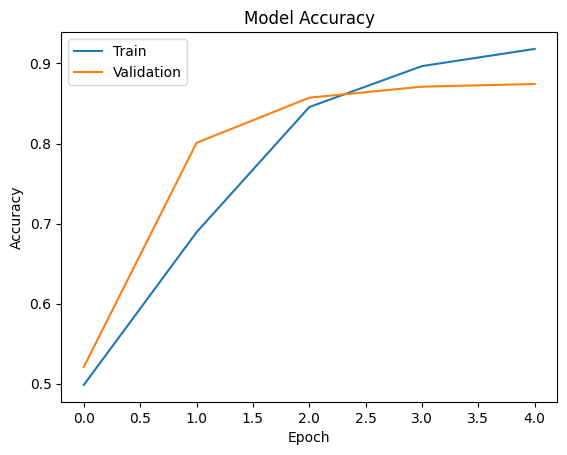

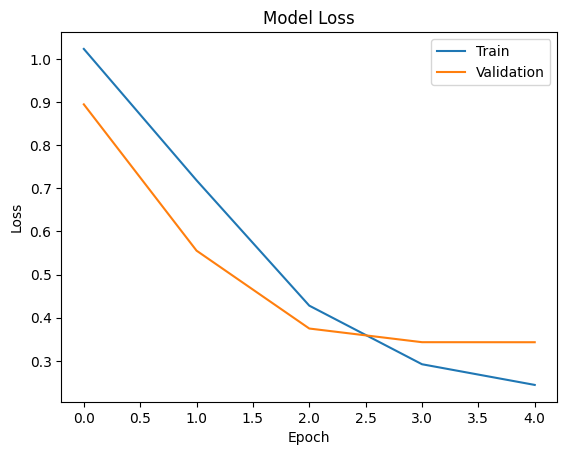

In [2]:
# Define model architecture
from sklearn.metrics import accuracy_score, classification_report
model = Sequential()
model.add(Embedding(len(vocab), 150, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
optimizer = Adam(
    learning_rate=2e-03, # HF recommendation
    epsilon=1e-08,
    clipnorm=1.0
)
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=3000)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
y_pred = model.predict(X_test)
label_scores = {}
for i, label in enumerate(set(y)):
    idx = np.where(y_test == i)[0]
    label_scores[label] = np.mean(y_pred[idx, i])

# print the label specific score
for label in label_scores:
    print('Score for label {}: {:.2f}%'.format(label, label_scores[label] * 100))

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [84]:
import datetime

# Get the current date
current_date = datetime.date.today().weekday()

# Print the weekday and weekday name
print("Weekday (index):", current_date)


Weekday (index): 5


In [14]:
model.save('Lstm.h5')

In [17]:

# Define model architecture
model = Sequential()
model.add(Embedding(len(vocab), 128, input_length=max_length))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(GRU(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(len(set(y)), activation='softmax'))
optimizer = Adam(
    learning_rate=1e-03, # HF recommendation
    epsilon=1e-08,
    clipnorm=1.0
)
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=3000)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
y_pred = model.predict(X_test)
label_scores = {}
for i, label in enumerate(set(y)):
    idx = np.where(y_test == i)[0]
    label_scores[label] = np.mean(y_pred[idx, i])

# print the label specific score
for label in label_scores:
    print('Score for label {}: {:.2f}%'.format(label, label_scores[label] * 100))


Epoch 1/8
13/13 [==============================] - 26s 2s/step - loss: 1.0368 - sparse_categorical_accuracy: 0.4920 - val_loss: 0.9820 - val_sparse_categorical_accuracy: 0.5085
Epoch 2/8
13/13 [==============================] - 24s 2s/step - loss: 0.8973 - sparse_categorical_accuracy: 0.5764 - val_loss: 0.7684 - val_sparse_categorical_accuracy: 0.6617
Epoch 3/8
13/13 [==============================] - 24s 2s/step - loss: 0.6827 - sparse_categorical_accuracy: 0.7177 - val_loss: 0.5741 - val_sparse_categorical_accuracy: 0.7883
Epoch 4/8
13/13 [==============================] - 24s 2s/step - loss: 0.4986 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.4388 - val_sparse_categorical_accuracy: 0.8341
Epoch 5/8
13/13 [==============================] - 25s 2s/step - loss: 0.3857 - sparse_categorical_accuracy: 0.8570 - val_loss: 0.3823 - val_sparse_categorical_accuracy: 0.8551
Epoch 6/8
13/13 [==============================] - 25s 2s/step - loss: 0.3234 - sparse_categorical_accuracy: 0.8809

In [12]:
# Save the model
model.save('biGRU.h5')

In [3]:

# Define model architecture
model = Sequential()
model.add(Embedding(len(vocab), 128, input_length=max_length))
model.add(SpatialDropout1D(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5, recurrent_dropout=0.5)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(y)), activation='softmax'))
optimizer = Adam(
    learning_rate=2e-03, # HF recommendation
    epsilon=1e-08,
    clipnorm=1.0
)
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=3000)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
y_pred = model.predict(X_test)
label_scores = {}
for i, label in enumerate(set(y)):
    idx = np.where(y_test == i)[0]
    label_scores[label] = np.mean(y_pred[idx, i])

# print the label specific score
for label in label_scores:
    print('Score for label {}: {:.2f}%'.format(label, label_scores[label] * 100))


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/8
13/13 [==============================] - 43s 3s/step - loss: 1.0381 - sparse_categorical_accuracy: 0.4916 - val_loss: 0.9559 - val_sparse_categorical_accuracy: 0.5123
Epoch 2/8
11/13 [========================>.....] - ETA: 4s - loss: 0.8481 - sparse_categorical_accuracy: 0.6131

KeyboardInterrupt: 

In [83]:
model.save('biGRU1.h5')

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Dropout

ticker_symbol = 'ADANIENT.NS'

start_date = '2022-12-14'
end_date = '2023-05-14'

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

close_data = stock_data['Close'].values

seq_length = 60

train_size = int(len(close_data) * 0.8)
train_data = close_data[:train_size]
test_data = close_data[train_size - seq_length:]

max_value = np.max(close_data)
min_value = np.min(close_data)
normalized_train_data = (train_data - min_value) / (max_value - min_value)
normalized_test_data = (test_data - min_value) / (max_value - min_value)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(normalized_train_data, seq_length)
X_test, y_test = create_sequences(normalized_test_data, seq_length)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32)

predictions = model.predict(X_test)

predictions = predictions * (max_value - min_value) + min_value

mse = np.mean((predictions - test_data) ** 2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)



[*********************100%***********************]  1 of 1 completed
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.0408
Epoch 2/50
1/1 [==============================] - 0s 72ms/step - loss: 0.0271
Epoch 3/50
1/1 [==============================] - 0s 64ms/step - loss: 0.0163
Epoch 4/50
1/1 [==============================] - 0s 64ms/step - loss: 0.0054
Epoch 5/50
1/1 [==============================] - 0s 64ms/step - loss: 0.0020
Epoch 6/50
1/1 [==============================] - 0s 72ms/step - loss: 0.0055
Epoch 7/50
1/1 [==============================] - 0s 57ms/step - loss: 0.0064
Epoch 8/50
1/1 [==============================] - 0s 65ms/step - loss: 0.0052
Epoch 9/50
1/1 [==============================] - 0s 65ms/step - loss: 0.0019
Epoch 10/50
1/1 [==============================] - 0s 65ms/step - loss: 0.0012
Epoch 11/50
1/1 [==============================] - 0s 65ms/step - loss: 0.0015
Epoch 12/50
1/1 [==============================] - 0s 66ms/step - loss: 0

In [37]:
y_test_new= y_test * (max_value - min_value) + min_value
date_new=stock_data.index.values[(len(data)-249):len(stock_data)]
plt.plot(date_new, predictions, label='Prediction price')
plt.plot(date_new, y_test_new, label='Original price')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')

plt.show()

NameError: name 'data' is not defined

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.0422
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.0280
Epoch 3/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0163
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 0.0092
Epoch 5/50
1/1 [==============================] - 0s 44ms/step - loss: 0.0050
Epoch 6/50
1/1 [==============================] - 0s 47ms/step - loss: 0.0067
Epoch 7/50
1/1 [==============================] - 0s 47ms/step - loss: 0.0119
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 0.0100
Epoch 9/50
1/1 [==============================] - 0s 47ms/step - loss: 0.0056
Epoch 10/50
1/1 [==============================] - 0s 46ms/step - loss: 0.0052
Epoch 11/50
1/1 [==============================] - 0s 42ms/step - loss: 0.0046
Epoch 12/50
1/1 [==============================] - 0s 44ms/step - loss: 0

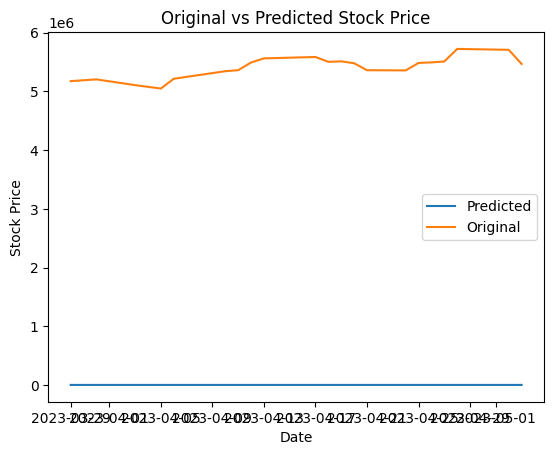

Root Mean Squared Error:  70.58238126685261
[[1786.3447]
 [1784.6438]
 [1782.9355]
 [1781.2695]
 [1779.5992]
 [1778.1787]
 [1777.2753]
 [1776.9382]
 [1777.2754]
 [1778.2992]
 [1779.9017]
 [1781.7845]
 [1783.7571]
 [1785.6477]
 [1787.2004]
 [1788.3453]
 [1789.295 ]
 [1790.1675]
 [1791.0264]
 [1792.19  ]
 [1793.6833]]


In [42]:
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Dropout

ticker_symbol = 'ADANIENT.NS'

start_date = '2022-12-03'
end_date = '2023-05-04'

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

close_data = stock_data['Close'].values

seq_length = 60

train_size = int(len(close_data) * 0.8)
train_data = close_data[:train_size]
test_data = close_data[train_size - seq_length:]

max_value = np.max(close_data)
min_value = np.min(close_data)
normalized_train_data = (train_data - min_value) / (max_value - min_value)
normalized_test_data = (test_data - min_value) / (max_value - min_value)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(normalized_train_data, seq_length)
X_test, y_test = create_sequences(normalized_test_data, seq_length)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32)

predictions = model.predict(X_test)
predictions = predictions * (max_value - min_value) + min_value
date_new = stock_data.index[-len(predictions):]  # Get the corresponding dates for the predicted data
test_data = test_data[-len(predictions):]  # Trim the original data to match the predicted data length
y_test_new= test_data * (max_value - min_value) + min_value
# Plotting the data
plt.plot(date_new, predictions, label='Predicted')
plt.plot(date_new, y_test_new, label='Original')

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Original vs Predicted Stock Price')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()



mse = np.mean((predictions - test_data) ** 2)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
print(predictions)




In [44]:
y_test_new = y_test * (max_value - min_value) + min_value
date_new = stock_data.index.values[(len(data) - 249 + seq_length):len(stock_data)]
plt.plot(date_new, predictions, label='Prediction')
plt.plot(date_new, y_test_new, label='Original')

plt.legend()

plt.title('Two Lines on a Single Graph')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.show()

NameError: name 'data' is not defined

In [30]:
import yfinance as yf

ticker_symbol = 'ADANIENT.NS'
start_date = '2023-01-01'
end_date = '2023-02-04'

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,3870.000000,3874.000000,3822.550049,3841.199951,3841.199951,923051
2023-01-03,3841.899902,3852.850098,3791.000000,3830.949951,3830.949951,799905
2023-01-04,3839.000000,3874.949951,3803.600098,3827.050049,3827.050049,1028377
2023-01-05,3827.050049,3842.399902,3756.899902,3829.800049,3829.800049,997006
2023-01-06,3829.000000,3868.250000,3797.050049,3824.250000,3824.250000,912159
2023-01-09,3843.000000,3880.000000,3811.250000,3855.300049,3855.300049,753981
2023-01-10,3859.000000,3862.050049,3555.000000,3646.899902,3646.899902,3595798
2023-01-11,3660.000000,3664.500000,3560.100098,3635.800049,3635.800049,2226506
2023-01-12,3642.500000,3679.000000,3612.000000,3647.199951,3647.199951,1199785
